3.255442017788768e-15
3.6171577975430755e-15


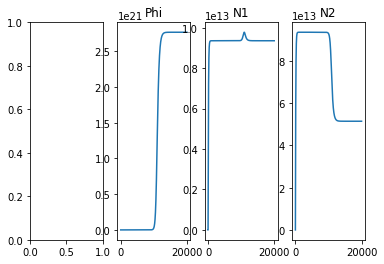

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

A21 = 1E7
A1 = 1E8
wavelength = 5E-7
sigma = ((wavelength*wavelength)*A21)/((2*np.pi)*(A21+A1))
sigma2 = .9*sigma
print(sigma2)
print(sigma)
l = 0.1
d = 1.0
RR = .97
c = 2.998E8
stepsize = 1E-9
steps = 20000
p = 4.68E20

N1_dat = []
N2_dat = []
Phi_dat = []
#Phi2_dat = []

N1_next = 0
N2_next = 0
Phi_next = 1
#Phi2_next = 1


def state1(N1,N2,Phi):#,Phi2):
    return A21*N2 - A1*N1 + Phi*sigma*(N2-N1)# + Phi2*sigma2*(N2-N1)
def state2(N1,N2,Phi):#,Phi2):
    return 2*p - A21*N2 - Phi*sigma*(N2-N1)# - Phi2*sigma2*(N2-N1)
def flux(N1,N2,Phi):#,Phi2):
    return (c/(2.0*d)) * Phi * (np.log(RR) + 2.0*(N2-N1)*sigma*l)
#def flux2(N1,N2,Phi,Phi2):
    #return (c/(2.0*d)) * Phi2 * (np.log(RR) + 2.0*(N2-N1)*sigma2*l)


for i in range(steps):
    if Phi_next < 1.0:
        Phi_next = 1.0
    #if Phi2_next < 1.0:
       # Phi2_next = 1.0
    
    
    N1_dat.append(N1_next)
    N2_dat.append(N2_next)
    Phi_dat.append(Phi_next)
    #Phi2_dat.append(Phi2_next)
    
    N1 = N1_next
    N2 = N2_next
    Phi = Phi_next
   # Phi2 = Phi2_next
    
    N1_next += (stepsize * state1(N1,N2,Phi))#,Phi2))
    N2_next += (stepsize * state2(N1,N2,Phi))#,Phi2))
    Phi_next += (stepsize * flux(N1,N2,Phi))#,Phi2))
   # Phi2_next += (stepsize * flux2(N1,N2,Phi))#,Phi2))
    
x = range(steps)
fig, axis = plt.subplots(1,4)  
axis[1].plot(x,Phi_dat)
axis[1].set_title("Phi")
#axis[1].plot(x,Phi2_dat)
#axis[1].set_title("Phi2")
axis[2].plot(x,N1_dat)
axis[2].set_title("N1")
axis[3].plot(x,N2_dat)
axis[3].set_title("N2")
plt.savefig("LasterHw6_test")